In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import datetime
from datetime import datetime as dt

In [54]:
with open('df_MTA.pickle', 'rb') as read_file:
    df_MTA = pickle.load(read_file)

In [55]:
df_MTA.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2224050
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2224053
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2224053
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2224055
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2224055


In [56]:
df_MTA.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [57]:
df_MTA.columns = [column.strip() for column in df_MTA.columns]

In [58]:
df_MTA.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [59]:
df_MTA.DATE.value_counts().sort_index()

03/30/2019    28919
03/31/2018    28129
03/31/2019    28944
04/01/2018    28084
04/01/2019    29152
              ...  
06/27/2018    28105
06/27/2019    29464
06/28/2018    28032
06/28/2019    29779
06/29/2018    27999
Name: DATE, Length: 182, dtype: int64

In [60]:
df_MTA.DATE.value_counts().sort_index().head(10)

03/30/2019    28919
03/31/2018    28129
03/31/2019    28944
04/01/2018    28084
04/01/2019    29152
04/02/2018    28049
04/02/2019    28975
04/03/2018    28189
04/03/2019    29104
04/04/2018    28154
Name: DATE, dtype: int64

In [61]:
df_MTA.DATE.value_counts().sort_index().tail(10)

06/24/2019    29479
06/25/2018    28175
06/25/2019    29437
06/26/2018    28195
06/26/2019    29417
06/27/2018    28105
06/27/2019    29464
06/28/2018    28032
06/28/2019    29779
06/29/2018    27999
Name: DATE, dtype: int64

In [62]:
mask0 = ((df_MTA["C/A"] == "PTH22")
         & (df_MTA["UNIT"] == "R540")
         & (df_MTA["SCP"] == "00-04-04")
         & (df_MTA["STATION"] == "PATH NEW WTC"))

In [63]:
df_MTA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5225091 entries, 0 to 5225090
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 438.5+ MB


### <font color='red'> Note that DATE skips from 5/7/2019 to 6/5/2019 below (for the combo of C/A, UNIT, SCP, STATION)

In [64]:
df_MTA[mask0][735:745]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
3707480,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/06/2019,16:28:02,REGULAR,11906,241444
3707481,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/06/2019,20:40:02,REGULAR,11906,241483
3707482,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/07/2019,00:52:02,REGULAR,11906,241487
3707483,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/07/2019,05:04:02,REGULAR,11906,241488
3707484,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/07/2019,09:16:02,REGULAR,11906,241635
4528584,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,06/05/2019,12:20:37,REGULAR,4,75
4528585,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,06/05/2019,16:32:37,REGULAR,4,84
4528586,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,06/05/2019,20:44:37,REGULAR,6,118
4528587,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,06/06/2019,00:56:37,REGULAR,10,120
4528588,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,06/06/2019,05:08:37,REGULAR,10,122


In [65]:
df_MTA["DATE_TIME"] = pd.to_datetime(df_MTA.DATE + " " + df_MTA.TIME, format="%m/%d/%Y %H:%M:%S")

In [66]:
df_MTA.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2224050,2018-03-31 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2224053,2018-03-31 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2224053,2018-03-31 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2224055,2018-03-31 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2224055,2018-03-31 16:00:00


In [67]:
df_MTA.to_pickle('df_MTA.pkl')

In [68]:
df_MTA = pd.read_pickle('df_MTA.pkl')

In [69]:
(df_MTA
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
1227598,N045,R187,01-06-00,81 ST-MUSEUM,2019-06-02 17:00:00,2
4180400,R249,R179,01-05-00,86 ST,2019-06-27 12:00:00,2
4180393,R249,R179,01-05-00,86 ST,2019-06-27 04:00:00,2
4180389,R249,R179,01-05-00,86 ST,2019-06-27 00:00:00,2
1224362,N045,R187,01-00-00,81 ST-MUSEUM,2019-06-02 17:00:00,2
1371588,N071,R013,00-00-02,34 ST-PENN STA,2019-04-20 08:00:00,2
1224357,N045,R187,01-00-00,81 ST-MUSEUM,2019-06-01 17:00:00,2
4354899,R306,R207,00-00-00,135 ST,2019-04-08 16:00:00,2
1039735,JFK03,R536,00-00-03,JFK JAMAICA CT1,2019-04-07 01:00:00,2
1370495,N071,R013,00-00-01,34 ST-PENN STA,2019-04-20 08:00:00,2


In [70]:
mask = ((df_MTA["C/A"] == "N071") & 
(df_MTA["UNIT"] == "R013") & 
(df_MTA["SCP"] == "00-00-02") & 
(df_MTA["STATION"] == "34 ST-PENN STA") &
(df_MTA["DATE_TIME"].dt.date == datetime.datetime(2019, 4, 20).date()))

In [71]:
df_MTA[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
3224649,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,00:00:00,RECOVR AUD,3071535,4512012,2019-04-20 00:00:00
3224650,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,04:00:00,REGULAR,8481280,10918514,2019-04-20 04:00:00
3224651,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,08:00:00,REGULAR,8481300,10918541,2019-04-20 08:00:00
3224652,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,08:00:00,RECOVR AUD,3071562,4512111,2019-04-20 08:00:00
3224653,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,12:00:00,REGULAR,3071678,4512313,2019-04-20 12:00:00
3224654,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,16:00:00,REGULAR,3071862,4512589,2019-04-20 16:00:00
3224655,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,20:00:00,REGULAR,3072147,4512819,2019-04-20 20:00:00


In [72]:
df_MTA.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True, ascending=True)

In [73]:
df_MTA.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [74]:
df_MTA[mask]

<ipython-input-74-042ba9a09348>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_MTA[mask]


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
3224649,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,00:00:00,RECOVR AUD,3071535,4512012,2019-04-20 00:00:00
3224650,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,04:00:00,REGULAR,8481280,10918514,2019-04-20 04:00:00
3224651,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,08:00:00,REGULAR,8481300,10918541,2019-04-20 08:00:00
3224653,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,12:00:00,REGULAR,3071678,4512313,2019-04-20 12:00:00
3224654,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,16:00:00,REGULAR,3071862,4512589,2019-04-20 16:00:00
3224655,N071,R013,00-00-02,34 ST-PENN STA,ACE,IND,04/20/2019,20:00:00,REGULAR,3072147,4512819,2019-04-20 20:00:00


In [75]:
df_MTA[mask0][730:750]

<ipython-input-75-a8afb80865b8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_MTA[mask0][730:750]


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
3707475,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/05/2019,19:28:02,REGULAR,11906,241195,2019-05-05 19:28:02
3707476,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/05/2019,23:40:02,REGULAR,11906,241201,2019-05-05 23:40:02
3707477,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/06/2019,03:52:02,REGULAR,11906,241202,2019-05-06 03:52:02
3707478,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/06/2019,08:04:02,REGULAR,11906,241257,2019-05-06 08:04:02
3707479,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/06/2019,12:16:02,REGULAR,11906,241442,2019-05-06 12:16:02
3707480,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/06/2019,16:28:02,REGULAR,11906,241444,2019-05-06 16:28:02
3707481,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/06/2019,20:40:02,REGULAR,11906,241483,2019-05-06 20:40:02
3707482,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/07/2019,00:52:02,REGULAR,11906,241487,2019-05-07 00:52:02
3707483,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/07/2019,05:04:02,REGULAR,11906,241488,2019-05-07 05:04:02
3707484,PTH22,R540,00-04-04,PATH NEW WTC,1,PTH,05/07/2019,09:16:02,REGULAR,11906,241635,2019-05-07 09:16:02


In [76]:
df_MTA.DESC.value_counts()

REGULAR       5206435
RECOVR AUD      18595
Name: DESC, dtype: int64

In [77]:
# confirm that there are no duplicates, that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" combo are unique
(df_MTA
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2018-03-31 00:00:00,1
3483350,R142,R293,01-06-00,34 ST-PENN STA,2019-04-09 14:00:00,1
3483357,R142,R293,01-06-00,34 ST-PENN STA,2019-04-10 18:00:00,1
3483356,R142,R293,01-06-00,34 ST-PENN STA,2019-04-10 14:00:00,1
3483355,R142,R293,01-06-00,34 ST-PENN STA,2019-04-10 10:00:00,1


In [78]:
df_MTA['YEAR'] = df_MTA["DATE_TIME"].dt.year

In [79]:
df_MTA.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,YEAR
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,00:00:00,REGULAR,6566463,2224050,2018-03-31 00:00:00,2018
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,04:00:00,REGULAR,6566470,2224053,2018-03-31 04:00:00,2018
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,08:00:00,REGULAR,6566470,2224053,2018-03-31 08:00:00,2018
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,12:00:00,REGULAR,6566470,2224055,2018-03-31 12:00:00,2018
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/31/2018,16:00:00,REGULAR,6566470,2224055,2018-03-31 16:00:00,2018


In [80]:
type(df_MTA.YEAR[0])

numpy.int64

In [81]:
df_MTA_2018 = df_MTA[df_MTA.YEAR == 2018]

In [82]:
df_MTA_2019 = df_MTA[df_MTA.YEAR == 2019]

In [83]:
df_MTA_2019_daily = (df_MTA_2019
                     .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)[["ENTRIES","EXITS"]]
                     .first())

In [84]:
df_MTA_2019_daily.head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,03/30/2019,6999064,2373568
1,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867
2,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095
3,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579
4,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133
5,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557
6,A002,R051,02-00-00,59 ST,04/05/2019,7006970,2376068
7,A002,R051,02-00-00,59 ST,04/06/2019,7008540,2376546
8,A002,R051,02-00-00,59 ST,04/07/2019,7009464,2376791
9,A002,R051,02-00-00,59 ST,04/08/2019,7010160,2377000


In [85]:
mask00 = ((df_MTA_2019_daily["C/A"] == "PTH22")
          & (df_MTA_2019_daily["UNIT"] == "R540")
          & (df_MTA_2019_daily["SCP"] == "00-04-04")
          & (df_MTA_2019_daily["STATION"] == "PATH NEW WTC"))

In [86]:
# see below, DATE skips from 05/07/2019 to 06/05/2019
df_MTA_2019_daily[mask00][38:40]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS
272965,PTH22,R540,00-04-04,PATH NEW WTC,05/07/2019,11906,241487
272966,PTH22,R540,00-04-04,PATH NEW WTC,06/05/2019,4,75


In [87]:
df_MTA_2019_daily["PREV_DATE"] = (df_MTA_2019_daily
                                  .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                  .DATE
                                  .apply(lambda group: group.shift(1)))

In [88]:
df_MTA_2019_daily["PREV_ENTRIES"] = (df_MTA_2019_daily
                                     .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                     .ENTRIES
                                     .apply(lambda group: group.shift(1)))

In [89]:
df_MTA_2019_daily["PREV_EXITS"] = (df_MTA_2019_daily
                                   .groupby(["C/A", "UNIT", "SCP", "STATION"])
                                   .EXITS
                                   .apply(lambda group: group.shift(1)))

In [90]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
0,A002,R051,02-00-00,59 ST,03/30/2019,6999064,2373568,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0
2,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0
3,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0
4,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0


In [91]:
mask00 = ((df_MTA_2019_daily["C/A"] == "PTH22")
          & (df_MTA_2019_daily["UNIT"] == "R540")
          & (df_MTA_2019_daily["SCP"] == "00-04-04")
          & (df_MTA_2019_daily["STATION"] == "PATH NEW WTC"))

In [92]:
# see below, DATE skips from 05/07/2019 to 06/05/2019
df_MTA_2019_daily[mask00][38:40]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
272965,PTH22,R540,00-04-04,PATH NEW WTC,05/07/2019,11906,241487,05/06/2019,11906.0,241202.0
272966,PTH22,R540,00-04-04,PATH NEW WTC,06/05/2019,4,75,05/07/2019,11906.0,241487.0


In [93]:
df_MTA_2019_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [94]:
df_MTA_2019_daily[df_MTA_2019_daily["ENTRIES"] < df_MTA_2019_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
7044,A025,R023,01-03-01,34 ST-HERALD SQ,03/31/2019,1238567092,1813218523,03/30/2019,1.238570e+09,1.813217e+09
7045,A025,R023,01-03-01,34 ST-HERALD SQ,04/01/2019,1238565030,1813219495,03/31/2019,1.238567e+09,1.813219e+09
7046,A025,R023,01-03-01,34 ST-HERALD SQ,04/02/2019,1238561212,1813221361,04/01/2019,1.238565e+09,1.813219e+09
7047,A025,R023,01-03-01,34 ST-HERALD SQ,04/03/2019,1238557159,1813223205,04/02/2019,1.238561e+09,1.813221e+09
7048,A025,R023,01-03-01,34 ST-HERALD SQ,04/04/2019,1238553023,1813225047,04/03/2019,1.238557e+09,1.813223e+09


In [95]:
(df_MTA_2019_daily[df_MTA_2019_daily["ENTRIES"] < df_MTA_2019_daily["PREV_ENTRIES"]]
 .groupby(["C/A", "UNIT", "SCP", "STATION"])
 .size())

C/A   UNIT  SCP       STATION        
A025  R023  01-03-01  34 ST-HERALD SQ    90
A037  R170  05-00-00  14 ST-UNION SQ      1
A038  R085  00-00-01  8 ST-NYU            1
            00-06-00  8 ST-NYU            1
A039  R085  01-00-01  8 ST-NYU            1
                                         ..
R623  R061  00-00-00  NOSTRAND AV         1
            00-00-01  NOSTRAND AV         1
R629  R065  00-00-00  ROCKAWAY AV         1
R646  R110  01-00-01  FLATBUSH AV-B.C    90
R730  R431  00-00-04  EASTCHSTER/DYRE    86
Length: 547, dtype: int64

In [96]:
df_reverse = df_MTA_2019_daily[df_MTA_2019_daily["ENTRIES"] < df_MTA_2019_daily["PREV_ENTRIES"]]

In [97]:
mask1 = (df_reverse["C/A"] == "A025") & (df_reverse["UNIT"] == "R023") & (df_reverse["SCP"] == "01-03-01") & (df_reverse["STATION"] == "34 ST-HERALD SQ")

In [98]:
df_reverse[mask1].head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
7044,A025,R023,01-03-01,34 ST-HERALD SQ,03/31/2019,1238567092,1813218523,03/30/2019,1.238570e+09,1.813217e+09
7045,A025,R023,01-03-01,34 ST-HERALD SQ,04/01/2019,1238565030,1813219495,03/31/2019,1.238567e+09,1.813219e+09
7046,A025,R023,01-03-01,34 ST-HERALD SQ,04/02/2019,1238561212,1813221361,04/01/2019,1.238565e+09,1.813219e+09
7047,A025,R023,01-03-01,34 ST-HERALD SQ,04/03/2019,1238557159,1813223205,04/02/2019,1.238561e+09,1.813221e+09
7048,A025,R023,01-03-01,34 ST-HERALD SQ,04/04/2019,1238553023,1813225047,04/03/2019,1.238557e+09,1.813223e+09
7049,A025,R023,01-03-01,34 ST-HERALD SQ,04/05/2019,1238549002,1813227008,04/04/2019,1.238553e+09,1.813225e+09
7050,A025,R023,01-03-01,34 ST-HERALD SQ,04/06/2019,1238544730,1813229073,04/05/2019,1.238549e+09,1.813227e+09
7051,A025,R023,01-03-01,34 ST-HERALD SQ,04/07/2019,1238541844,1813230567,04/06/2019,1.238545e+09,1.813229e+09
7052,A025,R023,01-03-01,34 ST-HERALD SQ,04/08/2019,1238539945,1813231642,04/07/2019,1.238542e+09,1.813231e+09
7053,A025,R023,01-03-01,34 ST-HERALD SQ,04/09/2019,1238535959,1813233567,04/08/2019,1.238540e+09,1.813232e+09


In [99]:
df_MTA_2019_daily["DAILY_ENTRIES"] = df_MTA_2019_daily["ENTRIES"] - df_MTA_2019_daily["PREV_ENTRIES"]

In [100]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,893.0
2,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,571.0
3,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1559.0
4,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1593.0
5,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0,1652.0


In [101]:
sorted(list(df_MTA_2019_daily["DAILY_ENTRIES"]))

[-2071638447.0,
 -1835263287.0,
 -1661415786.0,
 -1437240927.0,
 -1169826167.0,
 -1061119685.0,
 -839251708.0,
 -637594773.0,
 -621484707.0,
 -367651227.0,
 -203977526.0,
 -120092379.0,
 -117390566.0,
 -101331984.0,
 -100204544.0,
 -99035679.0,
 -68265206.0,
 -67020345.0,
 -56430367.0,
 -36966061.0,
 -16712443.0,
 -15417933.0,
 -13966875.0,
 -13653537.0,
 -12739002.0,
 -12367211.0,
 -11660388.0,
 -10992014.0,
 -10462768.0,
 -9646541.0,
 -9441161.0,
 -9028867.0,
 -8944069.0,
 -8876156.0,
 -8291694.0,
 -7602337.0,
 -7480203.0,
 -7244895.0,
 -7192862.0,
 -6996464.0,
 -6879370.0,
 -6545675.0,
 -6527032.0,
 -6332722.0,
 -5328487.0,
 -5213466.0,
 -5176463.0,
 -5060646.0,
 -4887297.0,
 -4765967.0,
 -4761938.0,
 -4675507.0,
 -4605247.0,
 -4316695.0,
 -4310678.0,
 -4209676.0,
 -4086371.0,
 -4067674.0,
 -3911407.0,
 -3755328.0,
 -3601649.0,
 -3583386.0,
 -3465848.0,
 -3274915.0,
 -3209280.0,
 -3125569.0,
 -3123910.0,
 -3072658.0,
 -3000555.0,
 -2898108.0,
 -2876157.0,
 -2802078.0,
 -2790972.0,
 

In [102]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter

In [103]:
df_MTA_2019_daily.drop(columns=["DAILY_ENTRIES"],inplace=True)

In [104]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS
1,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0
2,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0
3,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0
4,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0
5,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0


In [105]:
# 60 seconds per minute, 60 min per hour, 24 hours per day; assumption 1 person per second
60*60*24

86400

In [106]:
df_MTA_2019_daily["DAILY_ENTRIES"] = df_MTA_2019_daily.apply(get_daily_counts, axis=1, max_counter = 86400)

In [107]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,893.0
2,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,571.0
3,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1559.0
4,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1593.0
5,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0,1652.0


In [108]:
df_MTA_2019_daily.sort_values(by='DAILY_ENTRIES', ascending=False).head(20)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES
256140,PTH07,R550,00-01-06,CITY / BUS,06/12/2019,111,242,06/11/2019,85343.0,79992.0,85232.0
273139,PTH22,R540,00-04-06,PATH NEW WTC,06/05/2019,8,48,05/31/2019,84511.0,268115.0,84503.0
249492,PTH03,R552,00-01-08,JOURNAL SQUARE,06/08/2019,66,47,06/07/2019,84386.0,74161.0,84320.0
247788,PTH03,R552,00-00-00,JOURNAL SQUARE,06/08/2019,159,228,06/07/2019,84321.0,34517.0,84162.0
248759,PTH03,R552,00-01-00,JOURNAL SQUARE,05/24/2019,788,5450,05/23/2019,84213.0,152211.0,83425.0
87519,JFK03,R536,00-03-04,JFK JAMAICA CT1,05/01/2019,1,125,04/30/2019,83297.0,471268.0,83296.0
262762,PTH16,R550,01-02-02,LACKAWANNA,06/12/2019,7,770,06/11/2019,83248.0,357312.0,83241.0
245426,PTH01,R549,00-01-03,NEWARK HW BMEBE,05/30/2019,0,0,05/20/2019,83070.0,938506.0,83070.0
265487,PTH18,R549,01-01-01,NEWARK BM BW,06/06/2019,179,8,06/05/2019,82876.0,1819.0,82697.0
269915,PTH22,R540,00-00-01,PATH NEW WTC,05/16/2019,169,146,05/14/2019,82578.0,184412.0,82409.0


In [109]:
mask3 = ((df_MTA_2019_daily["C/A"] == "PTH22") 
         & (df_MTA_2019_daily["UNIT"] == "R540") 
         & (df_MTA_2019_daily["SCP"] == "00-04-06")
         & (df_MTA_2019_daily["STATION"] == "PATH NEW WTC"))

In [110]:
df_MTA_2019_daily[mask3][-30:-20]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES
273133,PTH22,R540,00-04-06,PATH NEW WTC,05/26/2019,83909,267068,05/25/2019,83899.0,266971.0,10.0
273134,PTH22,R540,00-04-06,PATH NEW WTC,05/27/2019,83930,267146,05/26/2019,83909.0,267068.0,21.0
273135,PTH22,R540,00-04-06,PATH NEW WTC,05/28/2019,83940,267210,05/27/2019,83930.0,267146.0,10.0
273136,PTH22,R540,00-04-06,PATH NEW WTC,05/29/2019,84130,267517,05/28/2019,83940.0,267210.0,190.0
273137,PTH22,R540,00-04-06,PATH NEW WTC,05/30/2019,84351,267822,05/29/2019,84130.0,267517.0,221.0
273138,PTH22,R540,00-04-06,PATH NEW WTC,05/31/2019,84511,268115,05/30/2019,84351.0,267822.0,160.0
273139,PTH22,R540,00-04-06,PATH NEW WTC,06/05/2019,8,48,05/31/2019,84511.0,268115.0,84503.0
273140,PTH22,R540,00-04-06,PATH NEW WTC,06/06/2019,164,121,06/05/2019,8.0,48.0,156.0
273141,PTH22,R540,00-04-06,PATH NEW WTC,06/07/2019,386,483,06/06/2019,164.0,121.0,222.0
273142,PTH22,R540,00-04-06,PATH NEW WTC,06/08/2019,500,774,06/07/2019,386.0,483.0,114.0


In [111]:
df_MTA_2019_daily[mask3]["DAILY_ENTRIES"].max()

84503.0

In [112]:
df_MTA_2019_daily[mask3]["DAILY_ENTRIES"].median()

148.0

In [113]:
df_MTA_2019_daily[mask3]["DAILY_ENTRIES"].max() / df_MTA_2019_daily[mask3]["DAILY_ENTRIES"].median()

570.9662162162163

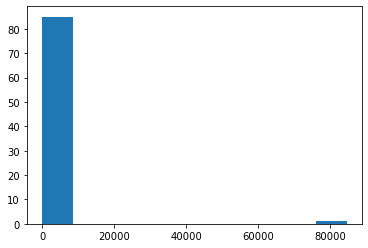

In [114]:
plt.hist(df_MTA_2019_daily[mask3].DAILY_ENTRIES)
plt.savefig('hist_PTH22_R540_000406_PATHNEWWTC.outlier.png');

In [115]:
df_MTA_2019_daily["DATE_DIFF"] = pd.to_datetime(df_MTA_2019_daily.DATE) - pd.to_datetime(df_MTA_2019_daily.PREV_DATE)

In [116]:
# look at all the rows where date_diff is greater than 1 day
df_MTA_2019_daily.sort_values(by="DATE_DIFF",ascending=False).head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF
246335,PTH02,R544,00-00-08,HARRISON,05/24/2019,142284,6516,04/13/2019,655363.0,82906.0,0.0,41 days
272966,PTH22,R540,00-04-04,PATH NEW WTC,06/05/2019,4,75,05/07/2019,11906.0,241487.0,11902.0,29 days
268439,PTH20,R549,03-00-08,NEWARK HM HE,05/20/2019,36975,1148746,04/25/2019,409.0,2356.0,36566.0,25 days
199341,N414A,R316,01-00-01,FLUSHING AV,05/02/2019,547675,230120,04/08/2019,547673.0,230118.0,2.0,24 days
199409,N414A,R316,01-00-02,FLUSHING AV,05/02/2019,1469103,668846,04/08/2019,1469100.0,668841.0,3.0,24 days
199477,N414A,R316,01-06-00,FLUSHING AV,05/02/2019,1721039,1610756,04/08/2019,1721035.0,1610752.0,4.0,24 days
199545,N414A,R316,01-06-01,FLUSHING AV,05/02/2019,2275461,2828879,04/08/2019,2275458.0,2828875.0,3.0,24 days
199273,N414A,R316,01-00-00,FLUSHING AV,05/02/2019,665527,741121,04/08/2019,665524.0,741116.0,3.0,24 days
78171,J002,R460,00-06-00,MARCY AV,05/08/2019,196696,218,04/17/2019,1969149.0,4031712.0,0.0,21 days
292397,R137,R031,02-03-01,34 ST-PENN STA,06/28/2019,76679,71988,06/11/2019,76679.0,56951.0,0.0,17 days


In [117]:
time_range = pd.timedelta_range(start='1 day',periods=1)

In [118]:
time_range

TimedeltaIndex(['1 days'], dtype='timedelta64[ns]', freq='D')

In [119]:
time_range[0]

Timedelta('1 days 00:00:00')

In [120]:
# create a new dataframe to filter those specific rows where the difference between DATE and PREV_DATE > 1 day
df_MTA_2019_multipledays = df_MTA_2019_daily[df_MTA_2019_daily.DATE_DIFF > time_range[0]]

In [121]:
len(df_MTA_2019_multipledays)

580

In [122]:
len(df_MTA_2019_daily)

435725

In [123]:
len(df_MTA_2019_daily) - len(df_MTA_2019_multipledays)

435145

In [124]:
# relatively small number of rows where DATE_DIFF > 1 day, so drop them/filter them out
df_MTA_2019_daily = df_MTA_2019_daily.loc[df_MTA_2019_daily.DATE_DIFF == time_range[0]]

In [125]:
# matches above (previous dataframe minus number of rows dropped)
len(df_MTA_2019_daily)

435145

In [126]:
# check that now there are no rows where DATE_DIFF > 1 day
df_MTA_2019_daily[df_MTA_2019_daily.DATE_DIFF > time_range[0]]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF


In [127]:
# for a unique turnstile at a subway station, find the max daily_entries
df_MTA_2019_dailymax = df_MTA_2019_daily.groupby(["C/A","UNIT","SCP","STATION"]).DAILY_ENTRIES.max()

In [128]:
# for a unique turnstile at a subway station, find the min daily_entries
df_MTA_2019_dailymed = df_MTA_2019_daily.groupby(["C/A","UNIT","SCP","STATION"]).DAILY_ENTRIES.median()

In [129]:
df_MTA_2019_dailymax = pd.DataFrame(df_MTA_2019_dailymax)

In [130]:
df_MTA_2019_dailymed = pd.DataFrame(df_MTA_2019_dailymed)

In [131]:
df_MTA_2019_dailymax.reset_index(inplace=True)

In [132]:
df_MTA_2019_dailymax.rename(columns={"DAILY_ENTRIES":"MAX_DAILY_ENTRIES_TURNSTILE"},inplace=True)

In [133]:
df_MTA_2019_dailymed.reset_index(inplace=True)

In [134]:
df_MTA_2019_dailymed

,C/A,UNIT,SCP,STATION,DAILY_ENTRIES
0,A002,R051,02-00-00,59 ST,1502.0
1,A002,R051,02-00-01,59 ST,1225.5
2,A002,R051,02-03-00,59 ST,488.5
3,A002,R051,02-03-01,59 ST,1279.0
4,A002,R051,02-03-02,59 ST,1305.5
...,...,...,...,...,...
4898,TRAM2,R469,00-00-01,RIT-ROOSEVELT,1413.5
4899,TRAM2,R469,00-03-00,RIT-ROOSEVELT,305.5
4900,TRAM2,R469,00-03-01,RIT-ROOSEVELT,308.0
4901,TRAM2,R469,00-05-00,RIT-ROOSEVELT,0.0


In [135]:
df_MTA_2019_dailymax["MEDIAN_DAILY_ENTRIES_TURNSTILE"] = np.nan

In [136]:
df_MTA_2019_dailymax

,C/A,UNIT,SCP,STATION,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE
0,A002,R051,02-00-00,59 ST,1703.0,NaN
1,A002,R051,02-00-01,59 ST,1329.0,NaN
2,A002,R051,02-03-00,59 ST,573.0,NaN
3,A002,R051,02-03-01,59 ST,1397.0,NaN
4,A002,R051,02-03-02,59 ST,1560.0,NaN
...,...,...,...,...,...,...
4898,TRAM2,R469,00-00-01,RIT-ROOSEVELT,3217.0,NaN
4899,TRAM2,R469,00-03-00,RIT-ROOSEVELT,1555.0,NaN
4900,TRAM2,R469,00-03-01,RIT-ROOSEVELT,1604.0,NaN
4901,TRAM2,R469,00-05-00,RIT-ROOSEVELT,3.0,NaN


In [137]:
# since df_MTA_2019_dailymax and df_MTA_2019_dailymed are groupby objects/dfs from the df, columns can be appended
for i in range(len(df_MTA_2019_dailymax)):
    df_MTA_2019_dailymax.iloc[i,5] = df_MTA_2019_dailymed.iloc[i,4]

In [138]:
df_MTA_2019_dailymax['peak_factor'] = df_MTA_2019_dailymax["MAX_DAILY_ENTRIES_TURNSTILE"] / df_MTA_2019_dailymax["MEDIAN_DAILY_ENTRIES_TURNSTILE"]

In [139]:
df_MTA_2019_dailymax.sort_values(by='peak_factor',ascending=False)

,C/A,UNIT,SCP,STATION,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor
4901,TRAM2,R469,00-05-00,RIT-ROOSEVELT,3.0,0.0,inf
3717,R226A,R131,03-05-00,23 ST,8.0,0.0,inf
654,E001,R368,00-05-00,9 AV,4.0,0.0,inf
1089,N022,R332,02-05-00,135 ST,2.0,0.0,inf
2835,PTH05,R543,00-04-09,EXCHANGE PLACE,3.0,0.0,inf
...,...,...,...,...,...,...,...
4799,R637,R451,00-06-00,WINTHROP ST,0.0,0.0,NaN
4805,R639,R109,00-05-01,CHURCH AV,0.0,0.0,NaN
4807,R639,R109,00-05-03,CHURCH AV,0.0,0.0,NaN
4829,R645,R110,00-05-01,FLATBUSH AV-B.C,0.0,0.0,NaN


In [140]:
mask5 = ((df_MTA_2019_daily["C/A"] == "TRAM2")
         & (df_MTA_2019_daily["UNIT"] == "R469")
         & (df_MTA_2019_daily["SCP"] == "00-05-01")
         & (df_MTA_2019_daily["STATION"] == "RIT-ROOSEVELT"))

In [141]:
df_MTA_2019_dailystats = df_MTA_2019_dailymax

In [142]:
df_MTA_2019_dailystats.head()

,C/A,UNIT,SCP,STATION,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor
0,A002,R051,02-00-00,59 ST,1703.0,1502.0,1.133822
1,A002,R051,02-00-01,59 ST,1329.0,1225.5,1.084455
2,A002,R051,02-03-00,59 ST,573.0,488.5,1.172979
3,A002,R051,02-03-01,59 ST,1397.0,1279.0,1.092260
4,A002,R051,02-03-02,59 ST,1560.0,1305.5,1.194944


In [143]:
df_MTA_2019_dailystats.replace(to_replace=np.inf,value=np.nan,inplace=True)

In [144]:
df_MTA_2019_dailystats.sort_values(by='peak_factor',ascending=False).head(20)

,C/A,UNIT,SCP,STATION,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor
3050,PTH22,R540,00-04-02,PATH NEW WTC,22190.0,1.0,22190.000000
3051,PTH22,R540,00-04-03,PATH NEW WTC,27148.0,5.0,5429.600000
1114,N026,R102,00-05-00,125 ST,13389.0,3.0,4463.000000
4535,R532,R328,00-05-03,METS-WILLETS PT,1691.0,0.5,3382.000000
4534,R532,R328,00-05-02,METS-WILLETS PT,2337.0,1.0,2337.000000
1194,N051,R084,02-05-00,59 ST COLUMBUS,5921.0,3.0,1973.666667
2866,PTH07,R550,00-02-01,CITY / BUS,13830.0,8.0,1728.750000
4532,R532,R328,00-05-00,METS-WILLETS PT,3967.0,2.5,1586.800000
2869,PTH07,R550,00-02-04,CITY / BUS,77120.0,53.0,1455.094340
2787,PTH03,R552,00-01-08,JOURNAL SQUARE,84320.0,74.0,1139.459459


In [145]:
mask6 = ((df_MTA_2019_daily["C/A"] == "B020")
         & (df_MTA_2019_daily["UNIT"] == "R263")
         & (df_MTA_2019_daily["SCP"] == "00-03-02")
         & (df_MTA_2019_daily["STATION"] == "AVENUE H"))

In [146]:
df_MTA_2019_daily[mask6][40:60]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF
33170,B020,R263,00-03-02,AVENUE H,05/10/2019,33597,299002,05/09/2019,33545.0,298663.0,52.0,1 days
33171,B020,R263,00-03-02,AVENUE H,05/11/2019,33640,299338,05/10/2019,33597.0,299002.0,43.0,1 days
33172,B020,R263,00-03-02,AVENUE H,05/12/2019,33671,299580,05/11/2019,33640.0,299338.0,31.0,1 days
33173,B020,R263,00-03-02,AVENUE H,05/13/2019,33693,299769,05/12/2019,33671.0,299580.0,22.0,1 days
33174,B020,R263,00-03-02,AVENUE H,05/14/2019,33745,300163,05/13/2019,33693.0,299769.0,52.0,1 days
33175,B020,R263,00-03-02,AVENUE H,05/15/2019,33820,300906,05/14/2019,33745.0,300163.0,75.0,1 days
33176,B020,R263,00-03-02,AVENUE H,05/16/2019,33871,301294,05/15/2019,33820.0,300906.0,51.0,1 days
33177,B020,R263,00-03-02,AVENUE H,05/17/2019,33921,301672,05/16/2019,33871.0,301294.0,50.0,1 days
33178,B020,R263,00-03-02,AVENUE H,05/18/2019,33968,302033,05/17/2019,33921.0,301672.0,47.0,1 days
33179,B020,R263,00-03-02,AVENUE H,05/19/2019,33995,302274,05/18/2019,33968.0,302033.0,27.0,1 days


In [147]:
df_MTA_2019_daily["unique_turnstile"] = (df_MTA_2019_daily["C/A"] + "_" +
                                         df_MTA_2019_daily["UNIT"] + "_" +
                                         df_MTA_2019_daily["SCP"] + "_" +
                                         df_MTA_2019_daily["STATION"])

In [148]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF,unique_turnstile
1,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,893.0,1 days,A002_R051_02-00-00_59 ST
2,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,571.0,1 days,A002_R051_02-00-00_59 ST
3,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1559.0,1 days,A002_R051_02-00-00_59 ST
4,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1593.0,1 days,A002_R051_02-00-00_59 ST
5,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0,1652.0,1 days,A002_R051_02-00-00_59 ST


In [149]:
df_MTA_2019_dailystats["unique_turnstile"] = (df_MTA_2019_dailystats["C/A"] + "_" +
                                              df_MTA_2019_dailystats["UNIT"] + "_" +
                                              df_MTA_2019_dailystats["SCP"] + "_" +
                                              df_MTA_2019_dailystats["STATION"])

In [150]:
df_MTA_2019_dailystats.head()

,C/A,UNIT,SCP,STATION,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor,unique_turnstile
0,A002,R051,02-00-00,59 ST,1703.0,1502.0,1.133822,A002_R051_02-00-00_59 ST
1,A002,R051,02-00-01,59 ST,1329.0,1225.5,1.084455,A002_R051_02-00-01_59 ST
2,A002,R051,02-03-00,59 ST,573.0,488.5,1.172979,A002_R051_02-03-00_59 ST
3,A002,R051,02-03-01,59 ST,1397.0,1279.0,1.092260,A002_R051_02-03-01_59 ST
4,A002,R051,02-03-02,59 ST,1560.0,1305.5,1.194944,A002_R051_02-03-02_59 ST


In [151]:
df_MTA_2019_dailystats_sum = df_MTA_2019_dailystats[["unique_turnstile","MAX_DAILY_ENTRIES_TURNSTILE","MEDIAN_DAILY_ENTRIES_TURNSTILE","peak_factor"]]

In [152]:
df_MTA_2019_daily.shape

(435145, 13)

In [153]:
df_MTA_2019_daily = df_MTA_2019_daily.merge(df_MTA_2019_dailystats_sum,how='left',on='unique_turnstile')

In [154]:
df_MTA_2019_daily.shape

(435145, 16)

In [155]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF,unique_turnstile,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor
0,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,893.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822
1,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,571.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822
2,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1559.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822
3,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1593.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822
4,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0,1652.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822


In [156]:
# create a mask where peak factor (max divided by median) is greater than 10 
# AND daily entries is at least 90% of max daily entries by turnstile
# AND max daily entries turnstile is at least 10000
mask7 = ((df_MTA_2019_daily['peak_factor'] > 10) 
         & (df_MTA_2019_daily['DAILY_ENTRIES'] >= 0.9*df_MTA_2019_daily["MAX_DAILY_ENTRIES_TURNSTILE"])
         & (df_MTA_2019_daily['MAX_DAILY_ENTRIES_TURNSTILE'] >= 10000))

In [157]:
df_MTA_2019_daily[mask7].sort_values(by="MAX_DAILY_ENTRIES_TURNSTILE",ascending=False).head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF,unique_turnstile,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor
252983,PTH07,R550,00-01-06,CITY / BUS,06/12/2019,111,242,06/11/2019,85343.0,79992.0,85232.0,1 days,PTH07_R550_00-01-06_CITY / BUS,85232.0,254.0,335.559055
246492,PTH03,R552,00-01-08,JOURNAL SQUARE,06/08/2019,66,47,06/07/2019,84386.0,74161.0,84320.0,1 days,PTH03_R552_00-01-08_JOURNAL SQUARE,84320.0,74.0,1139.459459
244821,PTH03,R552,00-00-00,JOURNAL SQUARE,06/08/2019,159,228,06/07/2019,84321.0,34517.0,84162.0,1 days,PTH03_R552_00-00-00_JOURNAL SQUARE,84162.0,429.0,196.181818
245772,PTH03,R552,00-01-00,JOURNAL SQUARE,05/24/2019,788,5450,05/23/2019,84213.0,152211.0,83425.0,1 days,PTH03_R552_00-01-00_JOURNAL SQUARE,83425.0,3150.0,26.484127
86465,JFK03,R536,00-03-04,JFK JAMAICA CT1,05/01/2019,1,125,04/30/2019,83297.0,471268.0,83296.0,1 days,JFK03_R536_00-03-04_JFK JAMAICA CT1,83296.0,213.5,390.145199


In [158]:
mask8 = ((df_MTA_2019_daily["C/A"] == "R532H")
         & (df_MTA_2019_daily["UNIT"] == "R328")
         & (df_MTA_2019_daily["SCP"] == "02-03-01")
         & (df_MTA_2019_daily["STATION"] == "METS-WILLETS PT"))

In [159]:
df_MTA_2019_daily[mask8][0:20]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF,unique_turnstile,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor
403607,R532H,R328,02-03-01,METS-WILLETS PT,03/31/2019,493868,903197,03/30/2019,489885.0,900693.0,3983.0,1 days,R532H_R328_02-03-01_METS-WILLETS PT,5464.0,97.0,56.329897
403608,R532H,R328,02-03-01,METS-WILLETS PT,04/01/2019,497496,905979,03/31/2019,493868.0,903197.0,3628.0,1 days,R532H_R328_02-03-01_METS-WILLETS PT,5464.0,97.0,56.329897
403609,R532H,R328,02-03-01,METS-WILLETS PT,04/02/2019,497623,906030,04/01/2019,497496.0,905979.0,127.0,1 days,R532H_R328_02-03-01_METS-WILLETS PT,5464.0,97.0,56.329897
403610,R532H,R328,02-03-01,METS-WILLETS PT,04/03/2019,497623,906044,04/02/2019,497623.0,906030.0,0.0,1 days,R532H_R328_02-03-01_METS-WILLETS PT,5464.0,97.0,56.329897
403611,R532H,R328,02-03-01,METS-WILLETS PT,04/04/2019,497637,906067,04/03/2019,497623.0,906044.0,14.0,1 days,R532H_R328_02-03-01_METS-WILLETS PT,5464.0,97.0,56.329897
403612,R532H,R328,02-03-01,METS-WILLETS PT,04/05/2019,497815,906686,04/04/2019,497637.0,906067.0,178.0,1 days,R532H_R328_02-03-01_METS-WILLETS PT,5464.0,97.0,56.329897
403613,R532H,R328,02-03-01,METS-WILLETS PT,04/06/2019,497815,906693,04/05/2019,497815.0,906686.0,0.0,1 days,R532H_R328_02-03-01_METS-WILLETS PT,5464.0,97.0,56.329897
403614,R532H,R328,02-03-01,METS-WILLETS PT,04/07/2019,498144,907384,04/06/2019,497815.0,906693.0,329.0,1 days,R532H_R328_02-03-01_METS-WILLETS PT,5464.0,97.0,56.329897
403615,R532H,R328,02-03-01,METS-WILLETS PT,04/08/2019,498502,908106,04/07/2019,498144.0,907384.0,358.0,1 days,R532H_R328_02-03-01_METS-WILLETS PT,5464.0,97.0,56.329897
403616,R532H,R328,02-03-01,METS-WILLETS PT,04/09/2019,498502,908129,04/08/2019,498502.0,908106.0,0.0,1 days,R532H_R328_02-03-01_METS-WILLETS PT,5464.0,97.0,56.329897


In [160]:
df_MTA_2019_daily.loc[mask7,"DAILY_ENTRIES"] = df_MTA_2019_daily.loc[mask7,"MEDIAN_DAILY_ENTRIES_TURNSTILE"]

In [161]:
df_MTA_2019_daily[mask7].head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF,unique_turnstile,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor
17228,A047,R087,00-06-02,CITY HALL,04/11/2019,458874,116,04/10/2019,490162.0,40053.0,763.0,1 days,A047_R087_00-06-02_CITY HALL,31288.0,763.0,41.006553
25263,A071,R044,02-06-00,CHAMBERS ST,05/24/2019,396,33,05/23/2019,22638.0,4615.0,510.0,1 days,A071_R044_02-06-00_CHAMBERS ST,22242.0,510.0,43.611765
32801,B020,R263,00-03-02,AVENUE H,05/21/2019,23,130,05/20/2019,34029.0,302471.0,38.0,1 days,B020_R263_00-03-02_AVENUE H,34006.0,38.0,894.894737
39024,B028,R136,01-00-01,SHEEPSHEAD BAY,06/03/2019,379,154,06/02/2019,40834.0,14522.0,1360.0,1 days,B028_R136_01-00-01_SHEEPSHEAD BAY,40455.0,1360.0,29.746324
53338,D005,R398,00-06-00,NEW UTRECHT AV,05/19/2019,441,188,05/18/2019,43521.0,11678.0,1450.5,1 days,D005_R398_00-06-00_NEW UTRECHT AV,43080.0,1450.5,29.700103
85304,JFK02,R535,01-00-03,HOWARD BCH JFK,05/01/2019,4,2,04/30/2019,50051.0,120591.0,261.5,1 days,JFK02_R535_01-00-03_HOWARD BCH JFK,50047.0,261.5,191.384321
85688,JFK03,R536,00-00-01,JFK JAMAICA CT1,05/25/2019,4,0,05/24/2019,34143.0,18610.0,781.0,1 days,JFK03_R536_00-00-01_JFK JAMAICA CT1,34139.0,781.0,43.711908
85859,JFK03,R536,00-00-03,JFK JAMAICA CT1,05/19/2019,66,66,05/18/2019,38430.0,17710.0,1593.0,1 days,JFK03_R536_00-00-03_JFK JAMAICA CT1,38364.0,1593.0,24.082863
85939,JFK03,R536,00-00-04,JFK JAMAICA CT1,05/12/2019,83389,471911,05/11/2019,9341.0,5171.0,1639.0,1 days,JFK03_R536_00-00-04_JFK JAMAICA CT1,74048.0,1639.0,45.178768
86042,JFK03,R536,00-00-05,JFK JAMAICA CT1,05/25/2019,523,289,05/24/2019,27564.0,14268.0,1625.0,1 days,JFK03_R536_00-00-05_JFK JAMAICA CT1,27041.0,1625.0,16.640615


In [162]:
df_MTA_2019_daily.sort_values(by="DAILY_ENTRIES",ascending=False).head(20)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF,unique_turnstile,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor
116379,N075,R111,01-05-00,23 ST,04/24/2019,196609,0,04/23/2019,262559.0,1.359348e+09,65950.0,1 days,N075_R111_01-05-00_23 ST,65950.0,0.0,NaN
151985,N196,R285,00-05-01,FAR ROCKAWAY,05/04/2019,65536,2,05/03/2019,839317244.0,1.678418e+08,65536.0,1 days,N196_R285_00-05-01_FAR ROCKAWAY,65536.0,0.0,NaN
248403,PTH04,R551,00-04-06,GROVE STREET,06/11/2019,445,602,06/10/2019,37185.0,2.520500e+04,36740.0,1 days,PTH04_R551_00-04-06_GROVE STREET,80941.0,1424.5,56.820639
245787,PTH03,R552,00-01-00,JOURNAL SQUARE,06/08/2019,1098,5074,06/07/2019,37425.0,6.944800e+04,36327.0,1 days,PTH03_R552_00-01-00_JOURNAL SQUARE,83425.0,3150.0,26.484127
245962,PTH03,R552,00-01-02,JOURNAL SQUARE,06/03/2019,355,823,06/02/2019,36408.0,6.405800e+04,36053.0,1 days,PTH03_R552_00-01-02_JOURNAL SQUARE,78748.0,1427.0,55.184303
38975,B028,R136,01-00-01,SHEEPSHEAD BAY,04/15/2019,83,60,04/14/2019,31228.0,1.126500e+04,31145.0,1 days,B028_R136_01-00-01_SHEEPSHEAD BAY,40455.0,1360.0,29.746324
247108,PTH04,R551,00-00-04,GROVE STREET,06/11/2019,208,934,06/10/2019,31186.0,6.117800e+04,30978.0,1 days,PTH04_R551_00-00-04_GROVE STREET,62742.0,531.0,118.158192
85932,JFK03,R536,00-00-04,JFK JAMAICA CT1,05/05/2019,942,535,05/04/2019,29459.0,1.860400e+04,28517.0,1 days,JFK03_R536_00-00-04_JFK JAMAICA CT1,74048.0,1639.0,45.178768
85912,JFK03,R536,00-00-04,JFK JAMAICA CT1,04/12/2019,1758,664,04/11/2019,28940.0,1.697600e+04,27182.0,1 days,JFK03_R536_00-00-04_JFK JAMAICA CT1,74048.0,1639.0,45.178768
257619,PTH13,R541,00-04-09,THIRTY ST,06/13/2019,0,0,06/12/2019,25794.0,9.476160e+05,25794.0,1 days,PTH13_R541_00-04-09_THIRTY ST,25794.0,0.0,NaN


In [164]:
sorted(df_MTA_2019_daily.PREV_EXITS,reverse=True)[:10]

[2124195831.0,
 2124193942.0,
 2124192592.0,
 2124189818.0,
 2124187001.0,
 2124184102.0,
 2124181188.0,
 2124178259.0,
 2124176260.0,
 2124174716.0]

In [165]:
df_MTA_2019_daily.head(10)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF,unique_turnstile,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor
0,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,893.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822
1,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,571.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822
2,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1559.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822
3,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1593.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822
4,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0,1652.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822
5,A002,R051,02-00-00,59 ST,04/05/2019,7006970,2376068,04/04/2019,7005332.0,2375557.0,1638.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822
6,A002,R051,02-00-00,59 ST,04/06/2019,7008540,2376546,04/05/2019,7006970.0,2376068.0,1570.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822
7,A002,R051,02-00-00,59 ST,04/07/2019,7009464,2376791,04/06/2019,7008540.0,2376546.0,924.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822
8,A002,R051,02-00-00,59 ST,04/08/2019,7010160,2377000,04/07/2019,7009464.0,2376791.0,696.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822
9,A002,R051,02-00-00,59 ST,04/09/2019,7011693,2377460,04/08/2019,7010160.0,2377000.0,1533.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822


In [166]:
def daily_exits(df, max_counter):
    """
    Function to calculate daily number of exits at turnstiles in NYC subway stations.
    Accounts for turnstiles in reverse order as well as large daily exits values.
    
    Args:
        df: pandas dataframe with columns "EXITS" and "PREV_EXITS"
        max_counter: integer
    
    Returns:
        counter
    """
    counter = df["EXITS"] - df["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(df["EXITS"], df["PREV_EXITS"])
    if counter > max_counter:
        return 0
    return counter

In [167]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF,unique_turnstile,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor
0,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,893.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822
1,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,571.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822
2,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1559.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822
3,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1593.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822
4,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0,1652.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822


In [168]:
df_MTA_2019_daily["DAILY_EXITS"] = df_MTA_2019_daily.apply(daily_exits, axis=1, max_counter=86400)

In [169]:
df_MTA_2019_daily.sort_values(by='DAILY_EXITS',ascending=False)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF,unique_turnstile,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor,DAILY_EXITS
85832,JFK03,R536,00-00-03,JFK JAMAICA CT1,04/22/2019,338,232,04/21/2019,204225.0,86285.0,338.0,1 days,JFK03_R536_00-00-03_JFK JAMAICA CT1,38364.0,1593.0,24.082863,86053.0
246231,PTH03,R552,00-01-05,JOURNAL SQUARE,06/08/2019,525,178,06/07/2019,263391.0,85750.0,525.0,1 days,PTH03_R552_00-01-05_JOURNAL SQUARE,749.0,625.0,1.198400,85572.0
267683,PTH22,R540,00-01-07,PATH NEW WTC,06/05/2019,2709,218,06/04/2019,101863.0,85383.0,2709.0,1 days,PTH22_R540_00-01-07_PATH NEW WTC,3008.0,2129.0,1.412870,85165.0
247044,PTH04,R551,00-00-04,GROVE STREET,04/05/2019,515,1144,04/04/2019,63257.0,85274.0,531.0,1 days,PTH04_R551_00-00-04_GROVE STREET,62742.0,531.0,118.158192,84130.0
265040,PTH20,R549,03-01-00,NEWARK HM HE,06/06/2019,3,371,06/05/2019,10095.0,83930.0,78.0,1 days,PTH20_R549_03-01-00_NEWARK HM HE,10092.0,78.0,129.384615,83559.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312501,R186,R036,00-05-01,DYCKMAN ST,05/16/2019,1,1010,05/15/2019,1.0,1010.0,0.0,1 days,R186_R036_00-05-01_DYCKMAN ST,0.0,0.0,NaN,0.0
312500,R186,R036,00-05-01,DYCKMAN ST,05/15/2019,1,1010,05/14/2019,1.0,1010.0,0.0,1 days,R186_R036_00-05-01_DYCKMAN ST,0.0,0.0,NaN,0.0
312499,R186,R036,00-05-01,DYCKMAN ST,05/14/2019,1,1010,05/13/2019,1.0,1010.0,0.0,1 days,R186_R036_00-05-01_DYCKMAN ST,0.0,0.0,NaN,0.0
312498,R186,R036,00-05-01,DYCKMAN ST,05/13/2019,1,1010,05/12/2019,1.0,1010.0,0.0,1 days,R186_R036_00-05-01_DYCKMAN ST,0.0,0.0,NaN,0.0


In [170]:
df_MTA_2019_daily_exits = (df_MTA_2019_daily
                           .groupby(["C/A","UNIT","SCP","STATION"])
                           .agg({"DAILY_EXITS": [np.max, np.median]}))

In [171]:
df_MTA_2019_daily_exits.reset_index(inplace=True)

In [172]:
df_MTA_2019_daily_exits.columns = ["C/A","UNIT","SCP","STATION","MAX_DAILY_EXITS_TURNSTILE","MEDIAN_DAILY_EXITS_TURNSTILE"]

In [173]:
df_MTA_2019_daily_exits['peak_factor_exits'] = df_MTA_2019_daily_exits["MAX_DAILY_EXITS_TURNSTILE"] / df_MTA_2019_daily_exits["MEDIAN_DAILY_EXITS_TURNSTILE"]

In [174]:
df_MTA_2019_daily_exits["unique_turnstile"] = (df_MTA_2019_daily_exits["C/A"] + "_" +
                                               df_MTA_2019_daily_exits["UNIT"] + "_" +
                                               df_MTA_2019_daily_exits["SCP"] + "_" +
                                               df_MTA_2019_daily_exits["STATION"])

In [175]:
df_MTA_2019_daily_exits.head()

,C/A,UNIT,SCP,STATION,MAX_DAILY_EXITS_TURNSTILE,MEDIAN_DAILY_EXITS_TURNSTILE,peak_factor_exits,unique_turnstile
0,A002,R051,02-00-00,59 ST,554.0,464.0,1.193966,A002_R051_02-00-00_59 ST
1,A002,R051,02-00-01,59 ST,350.0,262.5,1.333333,A002_R051_02-00-01_59 ST
2,A002,R051,02-03-00,59 ST,2335.0,2017.5,1.157373,A002_R051_02-03-00_59 ST
3,A002,R051,02-03-01,59 ST,2349.0,1966.0,1.194812,A002_R051_02-03-01_59 ST
4,A002,R051,02-03-02,59 ST,1664.0,1491.5,1.115655,A002_R051_02-03-02_59 ST


In [176]:
df_MTA_2019_daily_exits_sum = df_MTA_2019_daily_exits[["unique_turnstile","MAX_DAILY_EXITS_TURNSTILE","MEDIAN_DAILY_EXITS_TURNSTILE","peak_factor_exits"]]

In [177]:
df_MTA_2019_daily.shape

(435145, 17)

In [178]:
df_MTA_2019_daily = df_MTA_2019_daily.merge(df_MTA_2019_daily_exits_sum,how='left',on='unique_turnstile')

In [179]:
df_MTA_2019_daily.shape

(435145, 20)

In [180]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF,unique_turnstile,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor,DAILY_EXITS,MAX_DAILY_EXITS_TURNSTILE,MEDIAN_DAILY_EXITS_TURNSTILE,peak_factor_exits
0,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,893.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,299.0,554.0,464.0,1.193966
1,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,571.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,228.0,554.0,464.0,1.193966
2,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1559.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,484.0,554.0,464.0,1.193966
3,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1593.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,554.0,554.0,464.0,1.193966
4,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0,1652.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,424.0,554.0,464.0,1.193966


In [181]:
# create a mask where peak factor exits (max divided by median) is greater than 10 
# AND daily exits is at least 90% of max daily exits by turnstile
# AND max daily exits turnstile is at least 10000
mask9 = ((df_MTA_2019_daily['peak_factor_exits'] > 10) 
         & (df_MTA_2019_daily['DAILY_EXITS'] >= 0.9*df_MTA_2019_daily["MAX_DAILY_EXITS_TURNSTILE"])
         & (df_MTA_2019_daily['MAX_DAILY_EXITS_TURNSTILE'] >= 10000))

In [182]:
df_MTA_2019_daily[mask9].sort_values(by="MAX_DAILY_EXITS_TURNSTILE",ascending=False).head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF,unique_turnstile,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor,DAILY_EXITS,MAX_DAILY_EXITS_TURNSTILE,MEDIAN_DAILY_EXITS_TURNSTILE,peak_factor_exits
85832,JFK03,R536,00-00-03,JFK JAMAICA CT1,04/22/2019,338,232,04/21/2019,204225.0,86285.0,338.0,1 days,JFK03_R536_00-00-03_JFK JAMAICA CT1,38364.0,1593.0,24.082863,86053.0,86053.0,591.0,145.605753
246231,PTH03,R552,00-01-05,JOURNAL SQUARE,06/08/2019,525,178,06/07/2019,263391.0,85750.0,525.0,1 days,PTH03_R552_00-01-05_JOURNAL SQUARE,749.0,625.0,1.198400,85572.0,85572.0,220.0,388.963636
267683,PTH22,R540,00-01-07,PATH NEW WTC,06/05/2019,2709,218,06/04/2019,101863.0,85383.0,2709.0,1 days,PTH22_R540_00-01-07_PATH NEW WTC,3008.0,2129.0,1.412870,85165.0,85165.0,1849.0,46.060032
247044,PTH04,R551,00-00-04,GROVE STREET,04/05/2019,515,1144,04/04/2019,63257.0,85274.0,531.0,1 days,PTH04_R551_00-00-04_GROVE STREET,62742.0,531.0,118.158192,84130.0,84130.0,1030.0,81.679612
265040,PTH20,R549,03-01-00,NEWARK HM HE,06/06/2019,3,371,06/05/2019,10095.0,83930.0,78.0,1 days,PTH20_R549_03-01-00_NEWARK HM HE,10092.0,78.0,129.384615,83559.0,83559.0,358.0,233.405028


In [183]:
# for clear high outliers (see mask 9 details above), replace "DAILY EXITS" with median daily exits for that turnstile/station
df_MTA_2019_daily.loc[mask9,"DAILY_EXITS"] = df_MTA_2019_daily.loc[mask9,"MEDIAN_DAILY_EXITS_TURNSTILE"]

In [184]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF,unique_turnstile,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor,DAILY_EXITS,MAX_DAILY_EXITS_TURNSTILE,MEDIAN_DAILY_EXITS_TURNSTILE,peak_factor_exits
0,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,893.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,299.0,554.0,464.0,1.193966
1,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,571.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,228.0,554.0,464.0,1.193966
2,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1559.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,484.0,554.0,464.0,1.193966
3,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1593.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,554.0,554.0,464.0,1.193966
4,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0,1652.0,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,424.0,554.0,464.0,1.193966


In [185]:
df_MTA_2019_daily.sort_values(by="DAILY_EXITS",ascending=False).head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,DATE_DIFF,unique_turnstile,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor,DAILY_EXITS,MAX_DAILY_EXITS_TURNSTILE,MEDIAN_DAILY_EXITS_TURNSTILE,peak_factor_exits
272521,R102,R304,01-06-01,RECTOR ST,06/01/2019,54,1435,05/31/2019,1469.0,63335.0,1415.0,1 days,R102_R304_01-06-01_RECTOR ST,1633.0,30.5,53.540984,61900.0,82467.0,1478.0,55.796346
247108,PTH04,R551,00-00-04,GROVE STREET,06/11/2019,208,934,06/10/2019,31186.0,61178.0,30978.0,1 days,PTH04_R551_00-00-04_GROVE STREET,62742.0,531.0,118.158192,60244.0,84130.0,1030.0,81.679612
247970,PTH04,R551,00-04-01,GROVE STREET,06/08/2019,289,828,06/07/2019,53640.0,41994.0,1089.0,1 days,PTH04_R551_00-04-01_GROVE STREET,54670.0,1089.0,50.202020,41166.0,47724.0,952.0,50.130252
324175,R210,R044,00-06-01,BROOKLYN BRIDGE,05/30/2019,525172,280,05/29/2019,607191.0,38251.0,1691.0,1 days,R210_R044_00-06-01_BROOKLYN BRIDGE,82019.0,1691.0,48.503253,37971.0,55019.0,816.5,67.383956
414170,R610,R057,00-03-01,ATL AV-BARCLAY,05/03/2019,49,2471,05/02/2019,2537.0,39829.0,2488.0,1 days,R610_R057_00-03-01_ATL AV-BARCLAY,2488.0,875.0,2.843429,37358.0,37358.0,3977.0,9.393513


In [186]:
def proper(x):
    return x.title()

In [187]:
df_MTA_2019_daily['Station'] = df_MTA_2019_daily['STATION'].apply(proper)

In [188]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,...,DATE_DIFF,unique_turnstile,MAX_DAILY_ENTRIES_TURNSTILE,MEDIAN_DAILY_ENTRIES_TURNSTILE,peak_factor,DAILY_EXITS,MAX_DAILY_EXITS_TURNSTILE,MEDIAN_DAILY_EXITS_TURNSTILE,peak_factor_exits,Station
0,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,...,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,299.0,554.0,464.0,1.193966,59 St
1,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,...,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,228.0,554.0,464.0,1.193966,59 St
2,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,...,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,484.0,554.0,464.0,1.193966,59 St
3,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,...,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,554.0,554.0,464.0,1.193966,59 St
4,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0,...,1 days,A002_R051_02-00-00_59 ST,1703.0,1502.0,1.133822,424.0,554.0,464.0,1.193966,59 St


In [189]:
df_MTA_2019_daily.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'DATE', 'ENTRIES', 'EXITS',
       'PREV_DATE', 'PREV_ENTRIES', 'PREV_EXITS', 'DAILY_ENTRIES', 'DATE_DIFF',
       'unique_turnstile', 'MAX_DAILY_ENTRIES_TURNSTILE',
       'MEDIAN_DAILY_ENTRIES_TURNSTILE', 'peak_factor', 'DAILY_EXITS',
       'MAX_DAILY_EXITS_TURNSTILE', 'MEDIAN_DAILY_EXITS_TURNSTILE',
       'peak_factor_exits', 'Station'],
      dtype='object')

In [190]:
# drop some columns to clean up the dataframe
df_MTA_2019_daily.drop(columns=['DATE_DIFF','MAX_DAILY_ENTRIES_TURNSTILE','MEDIAN_DAILY_ENTRIES_TURNSTILE', 
                                'peak_factor', 'MAX_DAILY_EXITS_TURNSTILE', 'MEDIAN_DAILY_EXITS_TURNSTILE',
                                'peak_factor_exits'],inplace=True)

In [191]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,unique_turnstile,DAILY_EXITS,Station
0,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,893.0,A002_R051_02-00-00_59 ST,299.0,59 St
1,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,571.0,A002_R051_02-00-00_59 ST,228.0,59 St
2,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1559.0,A002_R051_02-00-00_59 ST,484.0,59 St
3,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1593.0,A002_R051_02-00-00_59 ST,554.0,59 St
4,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0,1652.0,A002_R051_02-00-00_59 ST,424.0,59 St


In [192]:
df_MTA_2019_daily["DAILY_TRAFFIC"] = df_MTA_2019_daily["DAILY_ENTRIES"] + df_MTA_2019_daily["DAILY_EXITS"] 

In [193]:
df_MTA_2019_daily["DATE_TIME"] = pd.to_datetime(df_MTA_2019_daily["DATE"])

In [194]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,unique_turnstile,DAILY_EXITS,Station,DAILY_TRAFFIC,DATE_TIME
0,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,893.0,A002_R051_02-00-00_59 ST,299.0,59 St,1192.0,2019-03-31
1,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,571.0,A002_R051_02-00-00_59 ST,228.0,59 St,799.0,2019-04-01
2,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1559.0,A002_R051_02-00-00_59 ST,484.0,59 St,2043.0,2019-04-02
3,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1593.0,A002_R051_02-00-00_59 ST,554.0,59 St,2147.0,2019-04-03
4,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0,1652.0,A002_R051_02-00-00_59 ST,424.0,59 St,2076.0,2019-04-04


In [195]:
df_MTA_2019_daily["year"] = df_MTA_2019_daily["DATE_TIME"].dt.year
df_MTA_2019_daily["month"] = df_MTA_2019_daily["DATE_TIME"].dt.month

In [196]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,unique_turnstile,DAILY_EXITS,Station,DAILY_TRAFFIC,DATE_TIME,year,month
0,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,893.0,A002_R051_02-00-00_59 ST,299.0,59 St,1192.0,2019-03-31,2019,3
1,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,571.0,A002_R051_02-00-00_59 ST,228.0,59 St,799.0,2019-04-01,2019,4
2,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1559.0,A002_R051_02-00-00_59 ST,484.0,59 St,2043.0,2019-04-02,2019,4
3,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1593.0,A002_R051_02-00-00_59 ST,554.0,59 St,2147.0,2019-04-03,2019,4
4,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0,1652.0,A002_R051_02-00-00_59 ST,424.0,59 St,2076.0,2019-04-04,2019,4


In [197]:
def string(x):
    return str(x)

In [198]:
df_MTA_2019_daily['period'] = df_MTA_2019_daily['year'].apply(string) + "_0" + df_MTA_2019_daily['month'].apply(string)

In [199]:
df_MTA_2019_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,EXITS,PREV_DATE,PREV_ENTRIES,PREV_EXITS,DAILY_ENTRIES,unique_turnstile,DAILY_EXITS,Station,DAILY_TRAFFIC,DATE_TIME,year,month,period
0,A002,R051,02-00-00,59 ST,03/31/2019,6999957,2373867,03/30/2019,6999064.0,2373568.0,893.0,A002_R051_02-00-00_59 ST,299.0,59 St,1192.0,2019-03-31,2019,3,2019_03
1,A002,R051,02-00-00,59 ST,04/01/2019,7000528,2374095,03/31/2019,6999957.0,2373867.0,571.0,A002_R051_02-00-00_59 ST,228.0,59 St,799.0,2019-04-01,2019,4,2019_04
2,A002,R051,02-00-00,59 ST,04/02/2019,7002087,2374579,04/01/2019,7000528.0,2374095.0,1559.0,A002_R051_02-00-00_59 ST,484.0,59 St,2043.0,2019-04-02,2019,4,2019_04
3,A002,R051,02-00-00,59 ST,04/03/2019,7003680,2375133,04/02/2019,7002087.0,2374579.0,1593.0,A002_R051_02-00-00_59 ST,554.0,59 St,2147.0,2019-04-03,2019,4,2019_04
4,A002,R051,02-00-00,59 ST,04/04/2019,7005332,2375557,04/03/2019,7003680.0,2375133.0,1652.0,A002_R051_02-00-00_59 ST,424.0,59 St,2076.0,2019-04-04,2019,4,2019_04


In [200]:
df_MTA_2019_daily_top20 = df_MTA_2019_daily.groupby('Station')['DAILY_TRAFFIC'].sum().sort_values(ascending=False).head(20)

In [201]:
df_MTA_2019_top20 = pd.DataFrame(df_MTA_2019_daily_top20)
df_MTA_2019_top20.reset_index(inplace=True)

In [202]:
df_MTA_2019_top20

,Station,DAILY_TRAFFIC
0,34 St-Penn Sta,25486836.5
1,Grd Cntrl-42 St,22208947.5
2,34 St-Herald Sq,19036897.0
3,Times Sq-42 St,15983692.0
4,14 St-Union Sq,15842602.0
5,23 St,15511267.5
6,42 St-Port Auth,15167608.0
7,Fulton St,13784909.0
8,86 St,13115762.0
9,125 St,11545330.0


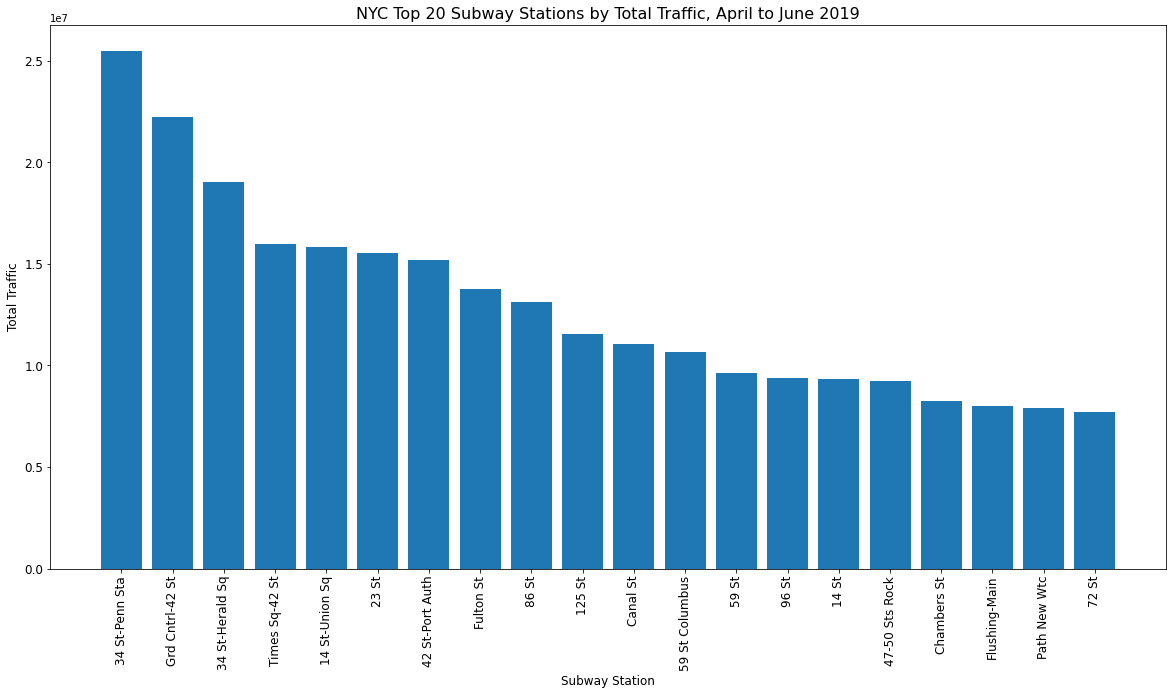

In [207]:
plt.figure(figsize=[20,10])
plt.bar(df_MTA_2019_top20.Station, df_MTA_2019_top20.DAILY_TRAFFIC)
plt.title('NYC Top 20 Subway Stations by Total Traffic, April to June 2019',fontsize=16)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Subway Station',fontsize=12)
plt.ylabel('Total Traffic',fontsize=12)
plt.savefig('top_20_stations.png');

In [208]:
df_MTA_2019_stations = df_MTA_2019_daily.groupby('Station')[['DAILY_TRAFFIC']].sum()

In [209]:
df_MTA_2019_stations.reset_index(inplace=True)

In [210]:
df_MTA_2019_stations.rename(columns={'DAILY_TRAFFIC':'total_traffic'},inplace=True)

In [211]:
df_MTA_2019_stations

,Station,total_traffic
0,1 Av,3042273.0
1,103 St,4059722.0
2,103 St-Corona,2793633.0
3,104 St,519194.0
4,110 St,1561324.0
...,...,...
373,Woodlawn,679504.0
374,World Trade Ctr,2494282.0
375,Wtc-Cortlandt,1878552.0
376,York St,1478995.0


In [212]:
df_MTA_2019_stations['traffic_pctile'] = df_MTA_2019_stations.total_traffic.rank(pct=True)

In [213]:
df_MTA_2019_stations.head()

,Station,total_traffic,traffic_pctile
0,1 Av,3042273.0,0.820106
1,103 St,4059722.0,0.880952
2,103 St-Corona,2793633.0,0.801587
3,104 St,519194.0,0.208995
4,110 St,1561324.0,0.611111


In [214]:
df_MTA_2019_stations['traffic_score'] = 10*df_MTA_2019_stations['traffic_pctile']

In [215]:
df_MTA_2019_stations = df_MTA_2019_stations.sort_values(by='total_traffic',ascending=False)

In [216]:
df_MTA_2019_stations.reset_index(drop=True,inplace=True)

In [217]:
df_MTA_2019_stations

,Station,total_traffic,traffic_pctile,traffic_score
0,34 St-Penn Sta,25486836.5,1.000000,10.000000
1,Grd Cntrl-42 St,22208947.5,0.997354,9.973545
2,34 St-Herald Sq,19036897.0,0.994709,9.947090
3,Times Sq-42 St,15983692.0,0.992063,9.920635
4,14 St-Union Sq,15842602.0,0.989418,9.894180
...,...,...,...,...
373,Beach 98 St,83846.0,0.013228,0.132275
374,Tompkinsville,61076.0,0.010582,0.105820
375,Beach 105 St,46525.0,0.007937,0.079365
376,Broad Channel,30897.0,0.005291,0.052910


## Start here

In [221]:
list1 = list(df_MTA_2019_top20['Station'])

In [222]:
list1

['34 St-Penn Sta',
 'Grd Cntrl-42 St',
 '34 St-Herald Sq',
 'Times Sq-42 St',
 '14 St-Union Sq',
 '23 St',
 '42 St-Port Auth',
 'Fulton St',
 '86 St',
 '125 St',
 'Canal St',
 '59 St Columbus',
 '59 St',
 '96 St',
 '14 St',
 '47-50 Sts Rock',
 'Chambers St',
 'Flushing-Main',
 'Path New Wtc',
 '72 St']

In [223]:
with open('nyc_subway.pickle','rb') as read_file:
    nyc_subway_final = pickle.load(read_file)

In [224]:
nyc_subway_final

,Division,Stop Name,Borough,Station_Division,Borough2,GTFS Latitude,GTFS Longitude,census_tract_id,HHIncomePct_score
0,BMT,1 Av,M,1 Av_BMT,Manhattan,40.730953,-73.981628,36061003400,8.0
1,BMT,104 St,Q,104 St_BMT,Queens,40.695178,-73.844330,36081002600,8.0
2,BMT,111 St,Q,111 St_BMT,Queens,40.697418,-73.836345,36081012400,7.0
3,BMT,121 St,Q,121 St_BMT,Queens,40.700492,-73.828294,36081014400,4.0
4,BMT,14 St - Union Sq,M,14 St - Union Sq_BMT,Manhattan,40.735736,-73.990568,36061005200,10.0
...,...,...,...,...,...,...,...,...,...
447,SIR,Richmond Valley,SI,Richmond Valley_SIR,StatenIsland,40.519631,-74.229141,36085022600,10.0
448,SIR,Prince's Bay,SI,Prince's Bay_SIR,StatenIsland,40.525507,-74.200064,36085019800,10.0
449,SIR,St George,SI,St George_SIR,StatenIsland,40.643748,-74.073643,36085000300,7.0
450,SIR,Stapleton,SI,Stapleton_SIR,StatenIsland,40.627915,-74.075162,36085002100,5.0


In [225]:
nyc_subway_final.loc[nyc_subway_final['Stop Name'] == 'Fulton St']

,Division,Stop Name,Borough,Station_Division,Borough2,GTFS Latitude,GTFS Longitude,census_tract_id,HHIncomePct_score
110,BMT,Fulton St,M,Fulton St_BMT,Manhattan,40.710374,-74.007582,36061001501,9.0
111,IND,Fulton St,M,Fulton St_IND,Manhattan,40.710197,-74.007691,36061001501,9.0
262,IND,Fulton St,Bk,Fulton St_IND,Brooklyn,40.687119,-73.975375,36047003300,10.0
382,IRT,Fulton St,M,Fulton St_IRT,Manhattan,40.709892,-74.008040,36061001502,10.0


In [236]:
df_subway_income = nyc_subway_final.groupby('Stop Name')[['HHIncomePct_score']].mean()

In [237]:
df_subway_income.reset_index(inplace=True)

In [239]:
df_subway_income.head()

,Stop Name,HHIncomePct_score
0,1 Av,8.0
1,103 St,1.0
2,103 St - Corona Plaza,4.0
3,104 St,6.5
4,110 St,3.0


In [240]:
list(df_subway_income['Stop Name'])

['1 Av',
 '103 St',
 '103 St - Corona Plaza',
 '104 St',
 '110 St',
 '111 St',
 '116 St',
 '116 St - Columbia University',
 '121 St',
 '125 St',
 '135 St',
 '137 St - City College',
 '138 St - Grand Concourse',
 '14 St',
 '14 St - Union Sq',
 '145 St',
 '149 St - Grand Concourse',
 '15 St - Prospect Park',
 '155 St',
 '157 St',
 '161 St - Yankee Stadium',
 '163 St - Amsterdam Av',
 '167 St',
 '168 St',
 '168 St - Washington Hts',
 '169 St',
 '170 St',
 '174 St',
 '174-175 Sts',
 '175 St',
 '176 St',
 '18 Av',
 '18 St',
 '181 St',
 '182-183 Sts',
 '183 St',
 '190 St',
 '191 St',
 '2 Av',
 '20 Av',
 '207 St',
 '21 St',
 '21 St - Queensbridge',
 '215 St',
 '219 St',
 '225 St',
 '23 St',
 '231 St',
 '233 St',
 '238 St',
 '25 Av',
 '25 St',
 '28 St',
 '3 Av',
 '3 Av - 138 St',
 '3 Av - 149 St',
 '30 Av',
 '33 St',
 '34 St - 11 Av',
 '34 St - Herald Sq',
 '34 St - Penn Station',
 '36 Av',
 '36 St',
 '39 Av',
 '4 Av',
 '40 St',
 '42 St - Bryant Pk',
 '42 St - Port Authority Bus Terminal',
 '4

In [247]:
df_subway_income.iloc[df_subway_income.loc[df_subway_income['Stop Name'] == '34 St - Penn Station'].index,0] = '34 St-Penn Sta'

In [248]:
df_subway_income.iloc[df_subway_income.loc[df_subway_income['Stop Name'] == 'Grand Central - 42 St'].index,0] = 'Grd Cntrl-42 St'

In [256]:
df_subway_income.iloc[df_subway_income.loc[df_subway_income['Stop Name'] == '42 St - Port Authority Bus Terminal'].index,0] = '42 St-Port Auth'

In [257]:
df_subway_income.iloc[df_subway_income.loc[df_subway_income['Stop Name'] == 'Times Sq - 42 St'].index,0] = 'Times Sq-42 St'

In [258]:
df_MTA_2019_stations.shape

(378, 4)

In [259]:
df_subway_income.shape

(377, 2)

In [260]:
df_final = df_MTA_2019_stations.merge(df_subway_income, how='left', left_on='Station', right_on='Stop Name')

In [261]:
df_final.head(20)

,Station,total_traffic,traffic_pctile,traffic_score,Stop Name,HHIncomePct_score
0,34 St-Penn Sta,25486836.5,1.000000,10.000000,34 St-Penn Sta,10.0
1,Grd Cntrl-42 St,22208947.5,0.997354,9.973545,Grd Cntrl-42 St,10.0
2,34 St-Herald Sq,19036897.0,0.994709,9.947090,NaN,NaN
3,Times Sq-42 St,15983692.0,0.992063,9.920635,Times Sq-42 St,10.0
4,14 St-Union Sq,15842602.0,0.989418,9.894180,NaN,NaN
5,23 St,15511267.5,0.986772,9.867725,23 St,10.0
6,42 St-Port Auth,15167608.0,0.984127,9.841270,42 St-Port Auth,1.0
7,Fulton St,13784909.0,0.981481,9.814815,Fulton St,9.5
8,86 St,13115762.0,0.978836,9.788360,86 St,6.0
9,125 St,11545330.0,0.976190,9.761905,125 St,3.0


### <span style="color:red"> *NEED to address these nulls (if time)*

In [263]:
df_final[df_final.isnull().any(axis=1)]

,Station,total_traffic,traffic_pctile,traffic_score,Stop Name,HHIncomePct_score
2,34 St-Herald Sq,19036897.0,0.994709,9.947090,NaN,NaN
4,14 St-Union Sq,15842602.0,0.989418,9.894180,NaN,NaN
11,59 St Columbus,10680661.0,0.970899,9.708995,NaN,NaN
13,96 St,9358247.0,0.965608,9.656085,96 St,NaN
15,47-50 Sts Rock,9237231.0,0.960317,9.603175,NaN,NaN
...,...,...,...,...,...,...
362,Aqueduct N.Cond,207268.0,0.042328,0.423280,NaN,NaN
366,E 143/St Mary'S,165794.0,0.031746,0.317460,NaN,NaN
367,Aqueduct Racetr,161098.0,0.029101,0.291005,NaN,NaN
371,Rockaway Park B,129541.0,0.018519,0.185185,NaN,NaN


In [86]:
weight1 = 0.7
weight2 = 1-weight1

In [87]:
df4['weighted_score'] = weight1*df4['traffic_score'] + weight2*df4['HHIncomePct_score']

In [88]:
df5 = df4.sort_values(by='weighted_score',ascending=False).head(10)

In [89]:
df5.reset_index(drop=True,inplace=True)

In [90]:
df5

,station,traffic,traffic_pctile,traffic_score,Stop Name,HHIncomePct_score,weighted_score
0,34 St-Penn Sta,424344522757,1.000000,10.000000,34 St-Penn Sta,10.0,10.000000
1,23 St,325345617021,0.994681,9.946809,23 St,10.0,9.962766
2,Grd Cntrl-42 St,249510446825,0.989362,9.893617,Grd Cntrl-42 St,10.0,9.925532
3,Times Sq-42 St,195229805010,0.976064,9.760638,Times Sq-42 St,10.0,9.832447
4,Fulton St,370811630036,0.997340,9.973404,Fulton St,9.5,9.831383
5,14 St,189121392610,0.968085,9.680851,14 St,10.0,9.776596
6,28 St,220045159641,0.986702,9.867021,28 St,9.5,9.756915
7,Wall St,166075576188,0.960106,9.601064,Wall St,10.0,9.720745
8,5 Av/53 St,149174463569,0.952128,9.521277,5 Av/53 St,10.0,9.664894
9,Canal St,140795742287,0.949468,9.494681,Canal St,10.0,9.646277


In [91]:
list2 = list(df5.station)

In [92]:
list2

['34 St-Penn Sta',
 '23 St',
 'Grd Cntrl-42 St',
 'Times Sq-42 St',
 'Fulton St',
 '14 St',
 '28 St',
 'Wall St',
 '5 Av/53 St',
 'Canal St']

In [93]:
len(df_MTA)

5735380

In [94]:
df_MTA_top10 = df_MTA.loc[df_MTA.Station.isin(list2)]

In [95]:
df_MTA_top10

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL,DAY,YEAR,MONTH,month,Station,month_yr
2655,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-03-31,00:00:00,REGULAR,2509282,2936214,5445496,Saturday,2018,3,March,Times Sq-42 St,March_2018
2656,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-03-31,04:00:00,REGULAR,2509310,2936238,5445548,Saturday,2018,3,March,Times Sq-42 St,March_2018
2657,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-03-31,08:00:00,REGULAR,2509334,2936283,5445617,Saturday,2018,3,March,Times Sq-42 St,March_2018
2658,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-03-31,12:00:00,REGULAR,2509477,2936569,5446046,Saturday,2018,3,March,Times Sq-42 St,March_2018
2659,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-03-31,16:00:00,REGULAR,2509699,2936905,5446604,Saturday,2018,3,March,Times Sq-42 St,March_2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7869190,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,2020-06-26,05:00:00,REGULAR,906565,34224,940789,Friday,2020,6,June,Grd Cntrl-42 St,June_2020
7869191,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,2020-06-26,09:00:00,REGULAR,906568,34224,940792,Friday,2020,6,June,Grd Cntrl-42 St,June_2020
7869192,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,2020-06-26,13:00:00,REGULAR,906570,34228,940798,Friday,2020,6,June,Grd Cntrl-42 St,June_2020
7869193,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,2020-06-26,17:00:00,REGULAR,906588,34231,940819,Friday,2020,6,June,Grd Cntrl-42 St,June_2020


In [96]:
len(df_MTA_top10)

678296

In [97]:
df_weekday = df_MTA_top10.groupby('DAY')['TOTAL'].sum()

In [98]:
df_weekday = df_weekday.sort_values(ascending=False)

In [99]:
y_ticks = np.linspace(3.25e11,3.55e11,7)

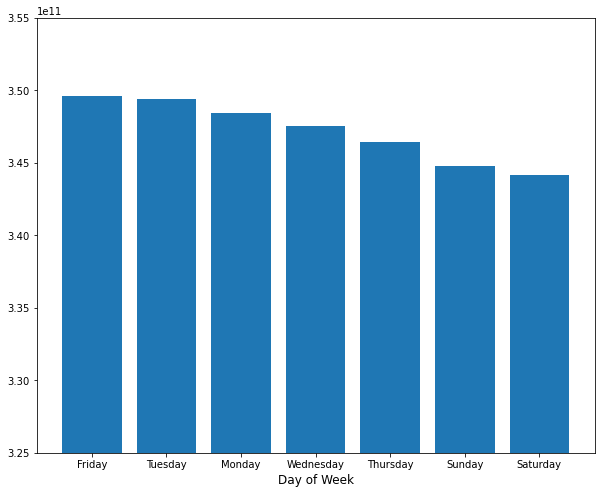

In [100]:
plt.figure(figsize=[10,8])
plt.bar(df_weekday.index,df_weekday)
plt.yticks(y_ticks)
plt.ylim(min(y_ticks),max(y_ticks))
plt.xlabel('Day of Week',fontsize=12);

In [101]:
df_MTA_top10_day = df_MTA_top10.loc[df_MTA_top10['DAY'].isin(['Friday','Tuesday','Monday'])]

In [102]:
len(df_MTA_top10_day)

292453

In [103]:
df_MTA_top10_day.reset_index(drop=True,inplace=True)

In [104]:
df_MTA_top10_day

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL,DAY,YEAR,MONTH,month,Station,month_yr
0,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-04-02,00:00:00,REGULAR,2510718,2938212,5448930,Monday,2018,4,April,Times Sq-42 St,April_2018
1,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-04-02,04:00:00,REGULAR,2510730,2938218,5448948,Monday,2018,4,April,Times Sq-42 St,April_2018
2,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-04-02,08:00:00,REGULAR,2510849,2938409,5449258,Monday,2018,4,April,Times Sq-42 St,April_2018
3,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-04-02,12:00:00,REGULAR,2511152,2939582,5450734,Monday,2018,4,April,Times Sq-42 St,April_2018
4,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-04-02,16:00:00,REGULAR,2511600,2940031,5451631,Monday,2018,4,April,Times Sq-42 St,April_2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292448,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,2020-06-26,05:00:00,REGULAR,906565,34224,940789,Friday,2020,6,June,Grd Cntrl-42 St,June_2020
292449,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,2020-06-26,09:00:00,REGULAR,906568,34224,940792,Friday,2020,6,June,Grd Cntrl-42 St,June_2020
292450,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,2020-06-26,13:00:00,REGULAR,906570,34228,940798,Friday,2020,6,June,Grd Cntrl-42 St,June_2020
292451,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,2020-06-26,17:00:00,REGULAR,906588,34231,940819,Friday,2020,6,June,Grd Cntrl-42 St,June_2020


In [105]:
df_MTA_top10_day.sort_values(by=['STATION','DATE','TIME']).tail(50)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL,DAY,YEAR,MONTH,month,Station,month_yr
290116,R203A,R043,01-05-00,WALL ST,45,IRT,2020-06-26,18:00:00,REGULAR,2,0,2,Friday,2020,6,June,Wall St,June_2020
290134,R203A,R043,01-05-01,WALL ST,45,IRT,2020-06-26,18:00:00,REGULAR,458752,4,458756,Friday,2020,6,June,Wall St,June_2020
290152,R203A,R043,01-06-01,WALL ST,45,IRT,2020-06-26,18:00:00,REGULAR,1224752,1657992,2882744,Friday,2020,6,June,Wall St,June_2020
290170,R204,R043,02-00-00,WALL ST,45,IRT,2020-06-26,18:00:00,REGULAR,2329969,5184377,7514346,Friday,2020,6,June,Wall St,June_2020
290188,R204,R043,02-00-01,WALL ST,45,IRT,2020-06-26,18:00:00,REGULAR,432428,903527,1335955,Friday,2020,6,June,Wall St,June_2020
290206,R204,R043,02-03-00,WALL ST,45,IRT,2020-06-26,18:00:00,REGULAR,866823,4486147,5352970,Friday,2020,6,June,Wall St,June_2020
290224,R204,R043,02-03-01,WALL ST,45,IRT,2020-06-26,18:00:00,REGULAR,630937,1326694,1957631,Friday,2020,6,June,Wall St,June_2020
290242,R204,R043,02-03-02,WALL ST,45,IRT,2020-06-26,18:00:00,REGULAR,49,579,628,Friday,2020,6,June,Wall St,June_2020
290260,R204,R043,02-03-03,WALL ST,45,IRT,2020-06-26,18:00:00,REGULAR,498273,1443517,1941790,Friday,2020,6,June,Wall St,June_2020
290278,R204,R043,02-05-00,WALL ST,45,IRT,2020-06-26,18:00:00,REGULAR,524324,2064,526388,Friday,2020,6,June,Wall St,June_2020


In [106]:
df_test = df_MTA_top10_day.loc[df_MTA_top10_day['DATE'] == '2020-06-12']

In [107]:
df_test

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL,DAY,YEAR,MONTH,month,Station,month_yr
268831,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2020-06-12,00:00:00,REGULAR,4035661,4701213,8736874,Friday,2020,6,June,Times Sq-42 St,June_2020
268832,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2020-06-12,04:00:00,REGULAR,4035662,4701216,8736878,Friday,2020,6,June,Times Sq-42 St,June_2020
268833,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2020-06-12,08:00:00,REGULAR,4035692,4701260,8736952,Friday,2020,6,June,Times Sq-42 St,June_2020
268834,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2020-06-12,12:00:00,REGULAR,4035721,4701334,8737055,Friday,2020,6,June,Times Sq-42 St,June_2020
268835,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2020-06-12,16:00:00,REGULAR,4035775,4701387,8737162,Friday,2020,6,June,Times Sq-42 St,June_2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276707,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,2020-06-12,05:00:00,REGULAR,906257,34064,940321,Friday,2020,6,June,Grd Cntrl-42 St,June_2020
276708,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,2020-06-12,09:00:00,REGULAR,906259,34066,940325,Friday,2020,6,June,Grd Cntrl-42 St,June_2020
276709,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,2020-06-12,13:00:00,REGULAR,906259,34068,940327,Friday,2020,6,June,Grd Cntrl-42 St,June_2020
276710,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,2020-06-12,17:00:00,REGULAR,906272,34071,940343,Friday,2020,6,June,Grd Cntrl-42 St,June_2020


In [108]:
sorted(df_test.TIME.unique())

['00:00:00',
 '01:00:00',
 '02:00:00',
 '03:00:00',
 '04:00:00',
 '05:00:00',
 '05:23:14',
 '06:00:00',
 '07:00:00',
 '08:00:00',
 '09:00:00',
 '10:00:00',
 '11:00:00',
 '12:00:00',
 '13:00:00',
 '14:00:00',
 '15:00:00',
 '16:00:00',
 '17:00:00',
 '18:00:00',
 '19:00:00',
 '20:00:00',
 '21:00:00',
 '22:00:00',
 '23:00:00']

In [109]:
df_MTA_time = df_MTA_top10_day.groupby(['DAY','TIME'])[['TOTAL']].sum()

In [110]:
df_MTA_time.reset_index(inplace=True)

In [111]:
df_MTA_time.head()

,DAY,TIME,TOTAL
0,Friday,00:00:00,30654273430
1,Friday,01:00:00,16881936018
2,Friday,02:00:00,6731787218
3,Friday,03:00:00,2983711135
4,Friday,04:00:00,30645812135


In [112]:
def hour(x):
    return x[:2]

In [114]:
df_MTA_time['hour'] = df_MTA_time['TIME'].map(hour)

In [115]:
df_MTA_time

,DAY,TIME,TOTAL,hour
0,Friday,00:00:00,30654273430,00
1,Friday,01:00:00,16881936018,01
2,Friday,02:00:00,6731787218,02
3,Friday,03:00:00,2983711135,03
4,Friday,04:00:00,30645812135,04
...,...,...,...,...
887,Tuesday,19:00:00,2987077240,19
888,Tuesday,20:00:00,30738368751,20
889,Tuesday,21:00:00,16883551657,21
890,Tuesday,22:00:00,6733097336,22


In [116]:
df_MTA_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DAY     892 non-null    object
 1   TIME    892 non-null    object
 2   TOTAL   892 non-null    int64 
 3   hour    892 non-null    object
dtypes: int64(1), object(3)
memory usage: 28.0+ KB


In [134]:
df_MTA_time2 = df_MTA_time.groupby(['hour'])['TOTAL'].sum().reset_index()

In [137]:
df_MTA_time2 = df_MTA_time2.sort_values(by='TOTAL',ascending=False)

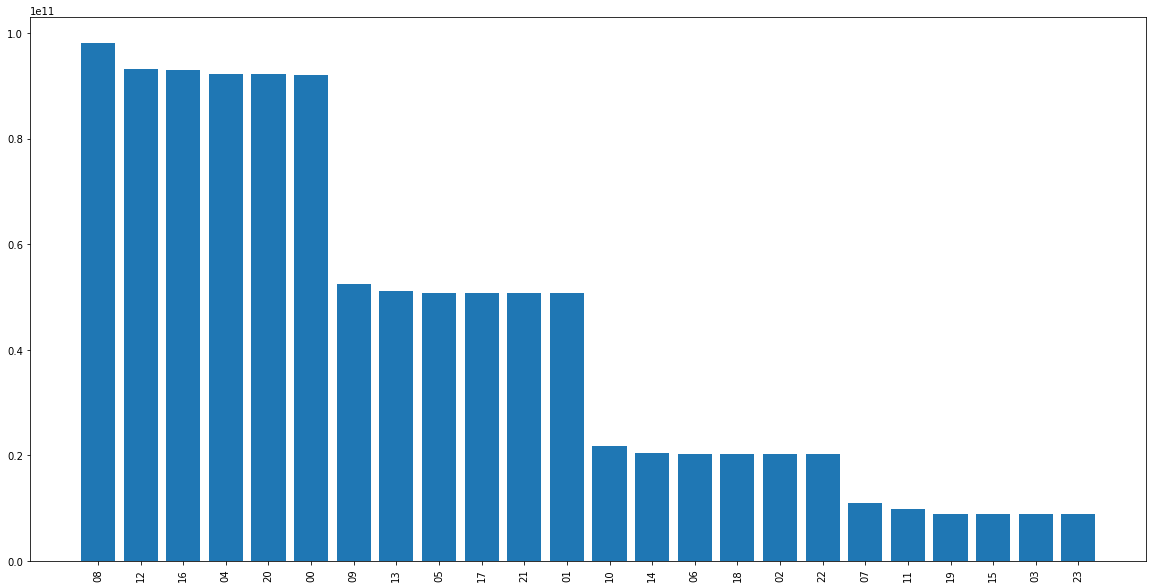

In [138]:
plt.figure(figsize=[20,10])
plt.bar(df_MTA_time2.hour, df_MTA_time2.TOTAL)
plt.xticks(rotation=90);

In [132]:
df_MTA_top10_day = df_MTA_top10_day[['Station','TIME','TOTAL','DAY','YEAR','month','month_yr']]

In [133]:
df_MTA_top10_day

,Station,DATE,TIME,TOTAL,DAY,YEAR,month,month_yr
0,Times Sq-42 St,2018-04-02,00:00:00,5448930,Monday,2018,April,April_2018
1,Times Sq-42 St,2018-04-02,04:00:00,5448948,Monday,2018,April,April_2018
2,Times Sq-42 St,2018-04-02,08:00:00,5449258,Monday,2018,April,April_2018
3,Times Sq-42 St,2018-04-02,12:00:00,5450734,Monday,2018,April,April_2018
4,Times Sq-42 St,2018-04-02,16:00:00,5451631,Monday,2018,April,April_2018
...,...,...,...,...,...,...,...,...
292448,Grd Cntrl-42 St,2020-06-26,05:00:00,940789,Friday,2020,June,June_2020
292449,Grd Cntrl-42 St,2020-06-26,09:00:00,940792,Friday,2020,June,June_2020
292450,Grd Cntrl-42 St,2020-06-26,13:00:00,940798,Friday,2020,June,June_2020
292451,Grd Cntrl-42 St,2020-06-26,17:00:00,940819,Friday,2020,June,June_2020


In [138]:
del df_MTA_top10_day['TIME_END']

In [141]:
df_MTA_top10

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TOTAL,DAY,YEAR,MONTH,month,Station,month_yr
2655,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-03-31,00:00:00,REGULAR,2509282,2936214,5445496,Saturday,2018,3,March,Times Sq-42 St,March_2018
2656,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-03-31,04:00:00,REGULAR,2509310,2936238,5445548,Saturday,2018,3,March,Times Sq-42 St,March_2018
2657,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-03-31,08:00:00,REGULAR,2509334,2936283,5445617,Saturday,2018,3,March,Times Sq-42 St,March_2018
2658,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-03-31,12:00:00,REGULAR,2509477,2936569,5446046,Saturday,2018,3,March,Times Sq-42 St,March_2018
2659,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,2018-03-31,16:00:00,REGULAR,2509699,2936905,5446604,Saturday,2018,3,March,Times Sq-42 St,March_2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7869190,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,2020-06-26,05:00:00,REGULAR,906565,34224,940789,Friday,2020,6,June,Grd Cntrl-42 St,June_2020
7869191,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,2020-06-26,09:00:00,REGULAR,906568,34224,940792,Friday,2020,6,June,Grd Cntrl-42 St,June_2020
7869192,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,2020-06-26,13:00:00,REGULAR,906570,34228,940798,Friday,2020,6,June,Grd Cntrl-42 St,June_2020
7869193,R241A,R048,00-00-04,GRD CNTRL-42 ST,4567S,IRT,2020-06-26,17:00:00,REGULAR,906588,34231,940819,Friday,2020,6,June,Grd Cntrl-42 St,June_2020


In [134]:
df_MTA_top10_day['TIME_END'] = df_MTA_top10_day['TIME'].shift(-1)

<ipython-input-134-97eb630ce690>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MTA_top10_day['TIME_END'] = df_MTA_top10_day['TIME'].shift(-1)


In [135]:
df_MTA_top10_day

,Station,DATE,TIME,TOTAL,DAY,YEAR,month,month_yr,TIME_END
0,Times Sq-42 St,2018-04-02,00:00:00,5448930,Monday,2018,April,April_2018,04:00:00
1,Times Sq-42 St,2018-04-02,04:00:00,5448948,Monday,2018,April,April_2018,08:00:00
2,Times Sq-42 St,2018-04-02,08:00:00,5449258,Monday,2018,April,April_2018,12:00:00
3,Times Sq-42 St,2018-04-02,12:00:00,5450734,Monday,2018,April,April_2018,16:00:00
4,Times Sq-42 St,2018-04-02,16:00:00,5451631,Monday,2018,April,April_2018,20:00:00
...,...,...,...,...,...,...,...,...,...
292448,Grd Cntrl-42 St,2020-06-26,05:00:00,940789,Friday,2020,June,June_2020,09:00:00
292449,Grd Cntrl-42 St,2020-06-26,09:00:00,940792,Friday,2020,June,June_2020,13:00:00
292450,Grd Cntrl-42 St,2020-06-26,13:00:00,940798,Friday,2020,June,June_2020,17:00:00
292451,Grd Cntrl-42 St,2020-06-26,17:00:00,940819,Friday,2020,June,June_2020,21:00:00


In [136]:
df_MTA_top10_day.groupby(['DAY','TIME','TIME_END'])[['TOTAL']].sum()

TOTAL
DAY     TIME     TIME_END             
Friday  00:00:00 04:00:00  30611681083
                 08:00:00     37369136
                 20:00:00      5223211
        01:00:00 04:42:05     36176663
                 04:44:34      3505800
...                                ...
Tuesday 22:00:00 02:00:00   6725443314
                 06:00:00      7654022
        23:00:00 03:00:00   2949473319
                 07:00:00       886313
                 11:00:00          558

[1399 rows x 1 columns]

In [61]:
nyc_subway_final.loc[nyc_subway_final['Stop Name'].isin(list1)]

,Division,Stop Name,Borough,Station_Division,Borough2,GTFS Latitude,GTFS Longitude,census_tract_id,HHIncomePct_score
1,BMT,104 St,Q,104 St_BMT,Queens,40.695178,-73.844330,36081002600,8.0
7,BMT,23 St,M,23 St_BMT,Manhattan,40.741303,-73.989344,36061005600,10.0
23,IND,72 St,M,72 St_IND,Manhattan,40.772196,-73.967417,36061014300,NaN
63,BMT,Bay Pkwy,Bk,Bay Pkwy_BMT,Brooklyn,40.606845,-73.987788,36047042800,5.0
80,BMT,Canal St,M,Canal St_BMT,Manhattan,40.718667,-74.000709,36061004500,10.0
84,BMT,Chambers St,M,Chambers St_BMT,Manhattan,40.713243,-74.003401,36061002900,1.0
110,BMT,Fulton St,M,Fulton St_BMT,Manhattan,40.710374,-74.007582,36061001501,9.0
111,IND,Fulton St,M,Fulton St_IND,Manhattan,40.710197,-74.007691,36061001501,9.0
165,IND,104 St,Q,104 St_IND,Queens,40.681711,-73.837683,36081009400,5.0
168,IND,125 St,M,125 St_IND,Manhattan,40.811109,-73.952343,36061020901,1.0
